In [1]:
###################################
# Drawbacks:
#  Expects .csv file with the first row being attribute titles
#  Drops NA

In [2]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from collections import OrderedDict

In [60]:
####################
# Takes a panda dataframe
# Creates an ORDERED dictionary containing 
# {colName: [possible_values]} for text attributes
# or {colName:[range]} for numerical attributes
####################
def getDataInfo(data):
    attributes = OrderedDict()
    for col in data.columns:
        if data[col].dtype != object:
            attributes[col] = [data[col].min(), data[col].max()]
        else:
            attributes[col] = list(data[col].unique())
    return attributes

In [112]:
#########################
# Deletes duplicates, one-hot encodes data
# Returns data (Pandas DF) and feature list (Dict)
#############################
def loadData(filename):
    data = pd.read_csv(filename).dropna()
    attributes = getDataInfo(data)
    data = pd.get_dummies(data)
    return (data, attributes)

In [51]:
################################
# Takes the test set, the targetCol, and the tree
# Computes the accuracy using sklearn's accuracy_score
# Returns the accuracy score
###############################
def getMetrics(myTree, myTests, targetCol):
    X = myTests.drop(targetCol).copy()
    y = myTests[targetCol]
    predictions = my_tree.predict(my_tests)
    accuracy =  accuracy_score(y, predictions)

In [52]:
#####################
# Learn new Tree 
# Will interactively guide user to enter all required files
# Returns array containing the tree, list of attributes, and the target attribute
#####################
def LearnNewTree():
    dataPath = input("Enter name of data file: ")
    while dataPath != "" and dataPath[-4:] != ".csv": 
        isCSV = input("Is this a CSV?: ").lower()
        if isCSV.find("y") != -1: dataPath += ".csv"
        else: dataPath = input("Sorry, we need a .CSV file.\nEnter New File: ")

    try: 
        data, attributes = loadData(dataPath)
        print("Choose Target column:")
        print(data.columns.values)
        targetCol = input(">> ")
        while not data.columns.contains(targetCol):
            print(data.columns.values)
            targetCol = input(">> ")
            
    except Exception as e:
        print("Exception: " ,e)
        print('Sorry, data invalid. Is {} a valid csv datafile?'.format(dataPath))
        return -1
    
    try:  
        #Split the Data
        train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)
    
        X = train_set.drop(targetCol, axis=1)
        y = train_set[targetCol].copy()
        attributes.pop(targetCol)
        print("Attributes: ", list(attributes))
              
    except Exception as e:
        print("Exception: " ,e)
        print("Sorry, target column invalid. Is {} a valid target column?".format(targetCol))
        return -1

    try: 
        depth = input("Max Depth, or -1 to use none\n>> ")
        while not depth.isnumeric() and not depth[1:].isnumeric()):
            depth = input("Max Depth, or -1 to use none\nPlease enter an integer\n>> ")
        if int(depth) > 0:
            myTree = DecisionTreeRegressor(max_depth = int(depth), random_state = 42)
        else:
            myTree = DecisionTreeRegressor(random_state = 42)

        myTree.fit(X, y)
        print("Tree Created")
        return [myTree, attributes, y.name]
              
    except Exception as e:
        print("Exception: " ,e)
        print("Sorry, Tree build failed")
        return -1

In [53]:
#####################
# Pickles the array containing tree, attributes and target
# Will interactively guide user to enter all required files
# Returns true if successful, o.w. print error and return false
#####################
def SaveTree(myTreeInfo):
    treeFile = ""
    while treeFile == "":
        treeFile = input("Tree File Name: ")
    try:
        pickle.dump(myTreeInfo, open(treeFile+".pickle", "wb"))
        return True
    
    except Exception as e:
        print("Oops, ", e)
        return false

In [54]:
#####################
# Unpickles the array containing the tree, attributes and target
# Will interactively guide user to enter all required files
# Returns the tree, attributes, and target 
#####################
def LoadTree():
    try:
        treeFile = ""
        while treeFile == "":
            treeFile = input("Tree File Name: ")
        myTreeInfo = pickle.load(open(treeFile+".pickle", "rb"))
        return myTreeInfo
    
    except Exception as e: 
        print("LoadTree file {} is invalid".format(treeFile))
        return -1
   
    

In [55]:
########################
# Allows for one test case
# Takes the tree, a list of attributes, and the target name
# Prompts user to enter the feature for each attribute
# (Note that these are one-hot encoded attributes)
# Returns the target
########################

def MakeDecision(myTreeInfo):
    try:
        tree, attributes = myTreeInfo[0], myTreeInfo[1]
        featureSet = []
        for oneAtr in attributes:
            userIn = ""
            while(not userIn.isnumeric()):
                userIn = input("{}: Range {}\n>> ".format(oneAtr, attributes[oneAtr]))
            featureSet.append(float(userIn))
        return tree.predict([featureSet])
    except Exception as e:
        print("Whoops! ", e)
        return -1

In [56]:
def main():
    try:
        myTree = -1 #empty Tree
        while(True):
            if myTree == -1:
                userIn = input("(1) to learn new decision tree\n"
                               "(4) to load previous decision tree\n"
                               "(5) to quit\n"
                               ">> "
                              )
            else: 
                userIn = input("(1) to learn new decision tree\n"
                               "(2) to save current tree\n"
                               "(3) to apply tree to new cases\n"
                               "(4) to load previous decision tree\n"
                               "(5) to quit\n"
                               ">> "
                              )
                
            if userIn.find("1") != -1:
                print("\nLearning New Tree\n")
                myTree = LearnNewTree()
            
            elif userIn.find("2") != -1:
                print("\nSaving Tree\n")
                SaveTree(myTree)
            
            elif userIn.find("3") != -1:
                print("\nApply Decision Tree\n")
                while(userIn.find("5") == -1):
                    print("Decision: ", MakeDecision(myTree))
                    userIn = input(  "(3) to continue decision-making\n"
                                     "(5) to quit\n"
                                     ">> "
                                  )
            
            elif userIn.find("4") != -1:
                print("\nLoading Tree\n")
                myTree = LoadTree()
            
            elif userIn.find("5") != -1:
                print("\nQuitting program...\n")
                break
            
            else:
                print("Sorry, command not recognized. Please try again.")
                continue
        print("Thank you for learning with our Decision Tree")
        print("Program exiting...")
    except Exception as e:
        print(e)
        print("Program terminating...")
        return(1)

In [63]:
 if __name__== "__main__": 
        myTreePicture = main()

(1) to learn new decision tree
(4) to load previous decision tree
(5) to quit
>> 1

Learning New Tree

Enter name of data file: test.csv
Choose Target column:
['Week' 'Price' 'Day_Monday' 'Day_Thursday' 'Day_Tuesday']
>> Price
Attributes:  ['Week', 'Day_Monday', 'Day_Thursday', 'Day_Tuesday']
Max Depth, or -1 to use none
>> 3
Tree Created
(1) to learn new decision tree
(2) to save current tree
(3) to apply tree to new cases
(4) to load previous decision tree
(5) to quit
>> 3

Apply Decision Tree

Week: Range [1, 5]
>> 2
Day_Monday: Range [0, 1]
>> 0
Day_Thursday: Range [0, 1]
>> 0
Day_Tuesday: Range [0, 1]
>> 1
Decision:  [5.]
(3) to continue decision-making
(5) to quit
>> 3
Week: Range [1, 5]
>> 1
Day_Monday: Range [0, 1]
>> 0
Day_Thursday: Range [0, 1]
>> 1
Day_Tuesday: Range [0, 1]
>> 0
Decision:  [10.]
(3) to continue decision-making
(5) to quit
>> 3
Week: Range [1, 5]
>> 2
Day_Monday: Range [0, 1]
>> 0
Day_Thursday: Range [0, 1]
>> 1
Day_Tuesday: Range [0, 1]
>> 0
Decision:  [6.8]

In [62]:
data, stuff = loadData("test.csv")
stuff

OrderedDict([('Week', [1, 5]),
             ('Price', [2, 10]),
             ('Day_Monday', [0, 1]),
             ('Day_Thursday', [0, 1]),
             ('Day_Tuesday', [0, 1])])

In [59]:
OrderedDict(stuff)

KeyError: ''

In [121]:
def Decision2(myTreeInfo):
    try:
        tree, attrSet = myTreeInfo[0], myTreeInfo[1]
        featureSet = {}
        for attr in attrSet:
            userIn = ""
            if type(attrSet[attr][0]) == str: 
                #String input - need to OneHot encode
                #set all possible values to 0 then set user-entered value to 1
                for possValue in attrSet[attr]:
                    featureSet[attr+"_"+possValue] = [0]
                while not userIn in attrSet[attr]:
                    userIn = input("{}: Possible values are {}".format(attr, attrSet[attr]))
                featureSet[attr+"_"+userIn] = [1] 
            else:
                while not userIn.isnumeric() and not userIn[1:].isnumeric(): #account for negatives
                    userIn = input("{}: Range is {}".format(attr, attrSet[attr]))
                featureSet[attr] = [float(userIn)]
        return tree.predict(pd.DataFrame(featureSet))
    except Exception as e:
        print("Whoops! ", e)
        return -1

Enter name of data file: test.csv
Choose Target column:
['Week' 'Price' 'Day_Monday' 'Day_Thursday' 'Day_Tuesday']
>> Price
Attributes:  ['Day', 'Week']
Max Depth, or -1 to use none
>> 2
Tree Created


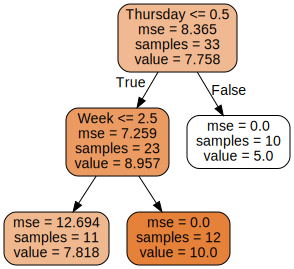

In [131]:
myTree=LearnNewTree()
showTree(myTree)

In [129]:
from sklearn.tree import export_graphviz

def showTree(myTree):
    export_graphviz(
        myTree[0],
        out_file="myTree",
        feature_names=["Week", "Monday", "Tuesday", "Thursday"],
        rounded=True,
        filled=True
    )
    from graphviz import render, Source
    return (Source.from_file('myTree'))

In [132]:
Decision2(myTree)

Day: Possible values are ['Monday', 'Tuesday', 'Thursday']Monday
Week: Range is [1, 5]1


array([5.])